In [8]:
import torch
import torchvision
from torch.autograd import Variable
def load_dataset():
    data_path='image/'
    train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=torchvision.transforms.ToTensor()
    )
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=1,
        num_workers=0,
        shuffle=True
    )
    return train_loader

dataset = load_dataset()

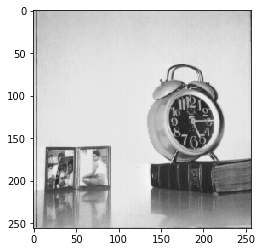

In [9]:
import matplotlib.pyplot as plt
for batch_idx,(data,target) in enumerate(dataset):
    img = Image.open('')

In [256]:
import numpy as np
from PIL import Image
img = Image.open('image/test/clock.tiff')

arr_img = np.array(img)

test_img = np.arange(64.0).reshape(8, 8)

def split_2d(array, splits):
    x = array.shape[0]/splits
    y = array.shape[1]/splits
    return np.split(np.concatenate(np.split(array, y, axis=1)), x*y)

# ab = split_2d(test_img,2)
print(test_img)
ab = split_2d(test_img,2)
c = np.concatenate(ab)
b = np.split(c,4)
d = np.concatenate(b,axis=1)
print(d)



[[ 0.  1.  2.  3.  4.  5.  6.  7.]
 [ 8.  9. 10. 11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20. 21. 22. 23.]
 [24. 25. 26. 27. 28. 29. 30. 31.]
 [32. 33. 34. 35. 36. 37. 38. 39.]
 [40. 41. 42. 43. 44. 45. 46. 47.]
 [48. 49. 50. 51. 52. 53. 54. 55.]
 [56. 57. 58. 59. 60. 61. 62. 63.]]
[[ 0.  1.  2.  3.  4.  5.  6.  7.]
 [ 8.  9. 10. 11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20. 21. 22. 23.]
 [24. 25. 26. 27. 28. 29. 30. 31.]
 [32. 33. 34. 35. 36. 37. 38. 39.]
 [40. 41. 42. 43. 44. 45. 46. 47.]
 [48. 49. 50. 51. 52. 53. 54. 55.]
 [56. 57. 58. 59. 60. 61. 62. 63.]]


In [215]:
import numpy as np
from PIL import Image

def BTC(image,size):
    x = image.shape[0]/size
    y = image.shape[1]/size
    block_image = np.split(np.concatenate(np.split(image,y,axis=1)),x*y)
    for i in range(len(block_image)):
        mean = np.mean(np.mean(block_image[i],axis=1))
        std = np.std(block_image[i])
        m =  size*size
        q = np.sum(block_image[i] > mean)
        
        a = mean - std*np.sqrt(q/(m-q))
        b = mean + std*np.sqrt((m-q)/q)
        
        
        block_image[i][block_image[i]>mean] = b
        block_image[i][block_image[i]<mean] = a
        
    return block_image


In [259]:
image = np.array([[245,239,249,239],[245,245,239,235],[245,245,245,245],[245,235,235,239]])
print(image.reshape(2,2))

ab = BTC(image,4)
print(ab)

[[245 239 249 239]
 [245 245 239 235]
 [245 245 245 245]
 [245 235 235 239]]
[array([[245, 236, 245, 236],
       [245, 245, 236, 236],
       [245, 245, 245, 245],
       [245, 236, 236, 236]])]


ValueError: array split does not result in an equal division

In [274]:
img = Image.open('image/test/clock.tiff')
arr_img = np.array(img)
print(arr_img.shape)
ab = BTC(arr_img,4)
c = np.concatenate(ab)
b = np.split(c,64)
d = np.concatenate(b,axis=1)
print(d)
print(d.shape)
img_crm = Image.fromarray(d)
# img_crm.show()

(256, 256)
[[150 150 150 ... 187 187 124]
 [186 186 186 ... 187 187 124]
 [186 186 186 ... 187 187 124]
 ...
 [178 178 178 ... 203 203 160]
 [178 178 178 ... 203 203 203]
 [193 193 193 ... 160 160 160]]
(256, 256)


In [273]:
import math
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

pnsr=psnr(arr_img,img_crm)
print(pnsr)

36.13784466704915


In [24]:
import numpy as np
temp = np.load('dataset.npy')

In [25]:
from PIL import Image
for i in range(len(temp)):
    temp1 = Image.fromarray(temp[i][0])
    temp1.save('dataset/'+str(i)+'.png')
    

In [17]:
import numpy as np
import numpy
import torch
def btc(image,size):
        # TODO: Reshape block_image to bethe same as image shape
        if image.shape[0]%size != 0:
            n = ((4*int(image.shape[0]/size))+4)-image.shape[0]
            print(n)
            image = np.pad(array=image,pad_width=(0,n),mode='reflect')
            print(image.shape)
        x = image.shape[0]/size
        y = image.shape[1]/size
        block_image = numpy.split(numpy.concatenate(numpy.split(image,y,axis=1)),x*y)
        for i in range(len(block_image)):
            mean = numpy.mean(np.mean(block_image[i],axis=1))
            std = numpy.std(block_image[i])
            m =  size*size
            q = numpy.sum(block_image[i] > mean)
            
            a = mean - std*numpy.sqrt(q/(m-q))
            b = mean + std*numpy.sqrt((m-q)/q)
            
            
            block_image[i][block_image[i]>mean] = b
            block_image[i][block_image[i]<mean] = a
        
        block_image = np.concatenate(block_image)
        block_image = np.split(block_image,x)
        
        return torch.tensor(np.concatenate(block_image,axis=1))

In [38]:
from PIL import Image
dataset = np.load('dataset/gs/dataset_npy.npy')
temp = dataset[0][0]
temp = temp[0:150,0:150]
pad = np.pad(array=temp,pad_width=2,mode='reflect')
Image.fromarray(pad).show()
btca = btc(temp,4)
Image.fromarray(btca.numpy()).show()

2
(152, 152)


d:\pycharmprojects\end-to-end-compression-framework\venv\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in long_scalars
d:\pycharmprojects\end-to-end-compression-framework\venv\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


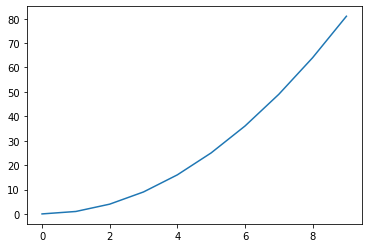

In [13]:
import matplotlib.pyplot as plt
import numpy as np

a = np.arange(10)
b = a*a
plt.plot(b)
plt.show()

In [15]:
import numpy as np
a = np.empty(10)

(10,)


In [4]:
import numpy as np
temp = np.load('./dataset/gs/dataset_npy.npy')

In [12]:
import numpy as np
print(temp[0][0].shape)
print(np.std(temp[0:140][0]))
print(np.mean(temp[0:140][0]))

(224, 224)
63.11390135470555
105.97411112882654


In [ ]:
import numpy as np
temp = np.load('./../dataset/gs/gray_scale.npy')

In [ ]:
sliced = temp[140:150]
from PIL import Image
for i in range(len(sliced)):
    temp1 = Image.fromarray(sliced[i])
    temp1.save('../dataset/test/grayscale/'+str(i)+'.png')

In [ ]:
print(np.mean(sliced))
print(np.std(sliced))